<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/%EC%8B%A4%EC%8A%B5_%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B6%84%EB%A5%98%EB%A5%BC%20%EC%9C%84%ED%95%9C%20CNN%20%EB%AA%A8%EB%8D%B8%20%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/training'
test_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/validation'

In [ ]:
num_epochs = 30
batch_size = 8

num_classes = 4
class_names = ['child', 'teenager', 'adult', 'elder']

In [ ]:
# ImageDataGenerator 를 통해 이미지 정규화
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# 지정된 경로에서 이미지 데이터 불러오기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 2320 images belonging to 4 classes.
Found 504 images belonging to 4 classes.


In [ ]:
# 데이터 shape: (224, 224, 3), 라벨 shape: (4,)
for train_data in train_generator.next():
    print(train_data[0])

[[[0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]
  [0.87843144 0.9058824  0.9294118 ]
  ...
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]]

 [[0.8745099  0.90196085 0.92549026]
  [0.87843144 0.9058824  0.9294118 ]
  [0.87843144 0.9058824  0.9294118 ]
  ...
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]]

 [[0.87843144 0.9058824  0.9294118 ]
  [0.87843144 0.9058824  0.9294118 ]
  [0.882353   0.909804   0.9333334 ]
  ...
  [0.882353   0.909804   0.9333334 ]
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]]

 ...

 [[0.23137257 0.18039216 0.14509805]
  [0.3019608  0.2509804  0.21960786]
  [0.40784317 0.35686275 0.3254902 ]
  ...
  [0.90196085 0.8980393  0.9215687 ]
  [0.9058824  0.90196085 0.92549026]
  [0.9058824  0.90196085 0.92549026]]

 [[0.23137257 0.18431373 0.18431373]
  [0.45098042 0.4039216  0.4039216 ]


In [ ]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(validation_generator)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

# 데이터 준비 및 시각화

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 라이브러리 import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import os
from glob import glob

## 데이터 불러오기

In [ ]:
os.listdir('/content/drive/MyDrive/실습_도현,원식,현균/dataset/training')

['0', '1', '2', '3']

In [ ]:
train_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/training'
test_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/validation'

In [ ]:
num_epochs = 30
batch_size = 8

num_classes = 4
class_names = ['child', 'teenager', 'adult', 'elder']

In [ ]:
# ImageDataGenerator 를 통해 이미지 정규화
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# 지정된 경로에서 이미지 데이터 불러오기
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 2320 images belonging to 4 classes.
Found 504 images belonging to 4 classes.


In [ ]:
# 데이터 shape: (224, 224, 3), 라벨 shape: (4,)
for train_data in train_generator.next():
    print(train_data[0])

[[[0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]
  [0.87843144 0.9058824  0.9294118 ]
  ...
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]]

 [[0.8745099  0.90196085 0.92549026]
  [0.87843144 0.9058824  0.9294118 ]
  [0.87843144 0.9058824  0.9294118 ]
  ...
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]
  [0.8745099  0.90196085 0.92549026]]

 [[0.87843144 0.9058824  0.9294118 ]
  [0.87843144 0.9058824  0.9294118 ]
  [0.882353   0.909804   0.9333334 ]
  ...
  [0.882353   0.909804   0.9333334 ]
  [0.87843144 0.9058824  0.9294118 ]
  [0.8745099  0.90196085 0.92549026]]

 ...

 [[0.23137257 0.18039216 0.14509805]
  [0.3019608  0.2509804  0.21960786]
  [0.40784317 0.35686275 0.3254902 ]
  ...
  [0.90196085 0.8980393  0.9215687 ]
  [0.9058824  0.90196085 0.92549026]
  [0.9058824  0.90196085 0.92549026]]

 [[0.23137257 0.18431373 0.18431373]
  [0.45098042 0.4039216  0.4039216 ]


In [ ]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(validation_generator)
test_labels

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

# CNN 분류 모델 생성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint("best_model.h5", monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
training = model.fit(
                train_generator,
                epochs=num_epochs,
                validation_data=validation_generator,
                shuffle=True,
                callbacks=[es, mc]
)

Epoch 1/30
23/73 [========>.....................] - ETA: 12:36 - loss: 1.5420 - acc: 0.3057

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


73/73 [==============================] - 1439s 19s/step - loss: 1.4248 - acc: 0.3185 - val_loss: 1.3695 - val_acc: 0.3135

Epoch 00001: val_acc improved from -inf to 0.31349, saving model to best_model.h5
Epoch 2/30
73/73 [==============================] - 20s 278ms/step - loss: 1.3515 - acc: 0.3685 - val_loss: 1.3597 - val_acc: 0.3631

Epoch 00002: val_acc improved from 0.31349 to 0.36310, saving model to best_model.h5
Epoch 3/30
73/73 [==============================] - 20s 280ms/step - loss: 1.3053 - acc: 0.3888 - val_loss: 1.2662 - val_acc: 0.4266

Epoch 00003: val_acc improved from 0.36310 to 0.42659, saving model to best_model.h5
Epoch 4/30
73/73 [==============================] - 21s 281ms/step - loss: 1.2441 - acc: 0.4315 - val_loss: 1.2738 - val_acc: 0.4206

Epoch 00004: val_acc did not improve from 0.42659
Epoch 5/30
73/73 [==============================] - 20s 279ms/step - loss: 1.1629 - acc: 0.4901 - val_loss: 1.2375 - val_acc: 0.4563

Epoch 00005: val_acc improved from 0.42

## 평가

In [ ]:
loss, acc = model.evaluate_generator(validation_generator)

print("\nLoss: {:.3f}, Acc: {:.3f}".format(loss, acc))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



Loss: 2.946, Acc: 0.444


### 모델의 훈련 과정 시각화

In [ ]:
def plt_show_loss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plt_show_acc(data):
    plt.plot(data.history['acc'])
    plt.plot(data.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

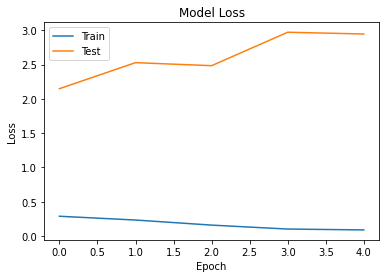

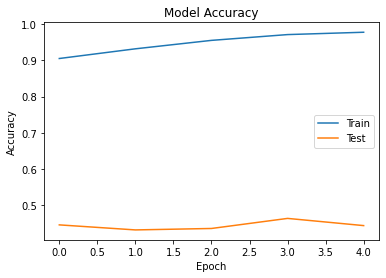

In [ ]:
plt_show_loss(training)
plt.show()

plt_show_acc(training)
plt.show()

시각화를 통해 현재 모델은 **과대적합** 상태라는 것을 알 수 있다  

**원인** : 아직 이미지가 face_crop 단계를 거치기 전이기 때문

## 예측

In [ ]:
predictions = model.predict(validation_generator)

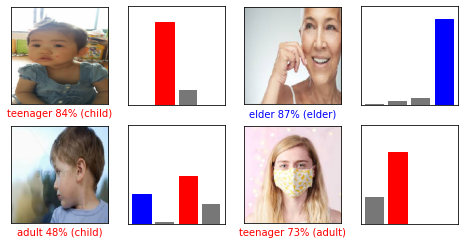

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    validated_label = np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[validated_label].set_color('blue')

num_rows = 2
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

----
결과값이 좋지 않으므로, face_crop 등 **데이터 보강** 이 필요하다

# 데이터 보강

## 1) ImageDataGenerator 활용

위에서 이미지 정규화의 효과만 줬던 `ImageDataGenerator`를 더 다양한 방식으로 활용해보기

1. `horizontal_flip=True` : 수평으로 회전
2. `rotation_range=45` : 랜덤하게 회전
3. `zoom_range=0.5` : 랜덤하게 확대하는 증강법  

일반적으로 데이터에 변형을 주는 방식은 **훈련 데이터에 대해서만** 진행한다  
따라서 `test_datagen` 은 원래대로 `정규화`만 진행

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   zoom_range=0.5)
test_datagen = ImageDataGenerator(rescale=1./255)

## 2) cv2 활용하여 얼굴만 잘라내기


1차 - `train data`에 대한 `face crop` 진행

In [ ]:
# openCV를 import하고 CascadeClassifier 불러오기
import numpy as np
import cv2
import glob
from tqdm.notebook import tqdm

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/실습_도현,원식,현균/dataset/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/실습_도현,원식,현균/dataset/haarcascade_eye.xml')

In [ ]:
for i in range(0, 4):
    train_path = glob.glob("/content/drive/MyDrive/실습_도현,원식,현균/dataset/training/{}/*.jpg".format(i))
    cv_img = []

    count_1 = 0
    for train_imgs in tqdm(train_path):
        try:
            img_array = np.fromfile(train_imgs, np.uint8)
            train_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            # train_img = cv2.imread(train_imgs)
            gray = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
            count_1 += 0
            print('1_예외 발생', e)
        
        count_2 = 0
        for (x, y, w, h) in faces:
            try:
                cropped = train_img[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
                cv_img.append(cropped)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = train_img[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
            except Exception as e:
                count_2 += 1
                print('2_예외 발생', e)
                cv_img.append(cropped)

    count_3 = 0
    for idx in tqdm(range(len(cv_img))):
        # other things you need to do snipped
        try:
            cv2.imwrite(f'./{i}/cropped_{idx}.jpg', cv_img[idx])
        except Exception as e:  
            count_3 += 1  
            print('3_예외 발생.', e)

print(count_1, count_2, count_3)

In [ ]:
!zip -r "/content/img_3_elder.zip" "/content/3"

from google.colab import files
files.download("img_3_elder.zip")

2차 - `test data`에 대한 `face crop` 진행

In [ ]:
for i in range(0, 4):
    test_path = glob.glob("/content/drive/MyDrive/실습_도현,원식,현균/dataset/validation/{}/*.jpg".format(i))
    cv_img = []

    count_1 = 0
    for test_imgs in tqdm(test_path):
        try:
            img_array = np.fromfile(test_imgs, np.uint8)
            test_img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
            # test_img = cv2.imread(test_imgs)
            gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
            count_1 += 0
            print('1_예외 발생', e)
        
        count_2 = 0
        for (x, y, w, h) in faces:
            try:
                cropped = test_img[y - int(h/4):y + h + int(h/4), x - int(w/4):x + w + int(w/4)]
                cv_img.append(cropped)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = test_img[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
            except Exception as e:
                count_2 += 1
                print('2_예외 발생', e)
                cv_img.append(cropped)

    count_3 = 0
    for idx in tqdm(range(len(cv_img))):
        # other things you need to do snipped
        try:
            cv2.imwrite(f'./{i}_test/cropped_{idx}.jpg', cv_img[idx])
        except Exception as e:  
            count_3 += 1  
            print('3_예외 발생.', e)

print(count_1, count_2, count_3)

In [ ]:
!zip -r "/content/test_img_0.zip" "/content/0_test"

from google.colab import files
files.download("test_img_0.zip")

In [ ]:
cv_img[0].shape

In [ ]:
# img_tmp = cropped[0]
# plt.imshow(cropped[..., 0], 'Brgb')
# plt.show()

from google.colab.patches import cv2_imshow
cv2_imshow(cv_img[180])

처리 완료하여 저장한 데이터를 다시 불러오기

In [ ]:
train_cropped_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/training_cropped'
test_cropped_dir = '/content/drive/MyDrive/실습_도현,원식,현균/dataset/validation_cropped'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_cropped_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_cropped_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 865 images belonging to 4 classes.
Found 173 images belonging to 4 classes.


In [ ]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(validation_generator)

## 3) CNN 모델에 Dropout 레이어와 'padding' 추가

- 드롭아웃(dropout):   

    신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나  
    드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끈다

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='SAME', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding='SAME'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'),
    MaxPooling2D(2, 2),
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint("best_model.h5", monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
training = model.fit(
                train_generator,
                epochs=num_epochs,
                validation_data=validation_generator,
                shuffle=True,
                callbacks=[es, mc]
)

Epoch 1/30
28/28 [==============================] - 327s 11s/step - loss: 1.5373 - acc: 0.2832 - val_loss: 1.3860 - val_acc: 0.2428

Epoch 00001: val_acc improved from -inf to 0.24277, saving model to best_model.h5
Epoch 2/30
28/28 [==============================] - 12s 434ms/step - loss: 1.3841 - acc: 0.3191 - val_loss: 1.3851 - val_acc: 0.2428

Epoch 00002: val_acc did not improve from 0.24277
Epoch 3/30
28/28 [==============================] - 12s 426ms/step - loss: 1.3770 - acc: 0.3191 - val_loss: 1.3817 - val_acc: 0.2428

Epoch 00003: val_acc did not improve from 0.24277
Epoch 4/30
28/28 [==============================] - 12s 426ms/step - loss: 1.3763 - acc: 0.3191 - val_loss: 1.3538 - val_acc: 0.2428

Epoch 00004: val_acc did not improve from 0.24277
Epoch 5/30
28/28 [==============================] - 12s 443ms/step - loss: 1.3741 - acc: 0.3191 - val_loss: 1.3653 - val_acc: 0.2428

Epoch 00005: val_acc did not improve from 0.24277
Epoch 6/30
28/28 [==============================]

## 2차 평가

In [ ]:
loss, acc = model.evaluate_generator(validation_generator)

print("\nLoss: {:.3f}, Acc: {:.3f}".format(loss, acc))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



Loss: 1.374, Acc: 0.243


### 모델의 훈련 과정 시각화

In [ ]:
def plt_show_loss(data):
    plt.plot(data.history['loss'])
    plt.plot(data.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plt_show_acc(data):
    plt.plot(data.history['acc'])
    plt.plot(data.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

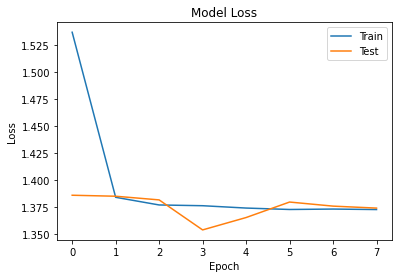

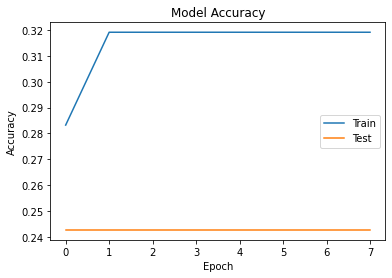

In [ ]:
plt_show_loss(training)
plt.show()

plt_show_acc(training)
plt.show()

## 2차 예측

In [ ]:
predictions = model.predict(validation_generator)

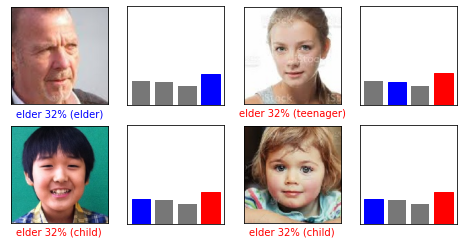

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[np.argmax(true_label)]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    validated_label = np.argmax(true_label)

    thisplot[predicted_label].set_color('red')
    thisplot[validated_label].set_color('blue')

num_rows = 2
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

데이터 처리 후 오히려 결과가 더 좋지 않아졌음을 확인할 수 있다  

따라서, 원래의 원본 데이터를 이용하되 분류 모델을 변경해서 다시 분류해볼 필요가 있다